In [2]:
import keras
keras.__version__

'2.1.6'

In [3]:
from keras.datasets import reuters

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [19]:
len(train_data)

8982

In [20]:
len(test_data)

2246

In [21]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [22]:
print(train_labels[0])

3


In [23]:
## vectorize data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [24]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [25]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [27]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [28]:
## validate approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 2.6054 - acc: 0.5283 - val_loss: 1.6783 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.3996 - acc: 0.7043 - val_loss: 1.2834 - val_acc: 0.7140
Epoch 3/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.0578 - acc: 0.7670 - val_loss: 1.1213 - val_acc: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.8327 - acc: 0.8197 - val_loss: 1.0210 - val_acc: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.6667 - acc: 0.8596 - val_loss: 0.9675 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.5322 - acc: 0.8916 - val_loss: 0.9199 - val_acc: 0.8170
Epoch 7/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.4310 - acc: 0.9100 - val_loss: 0.9190 - val_acc: 0.8080


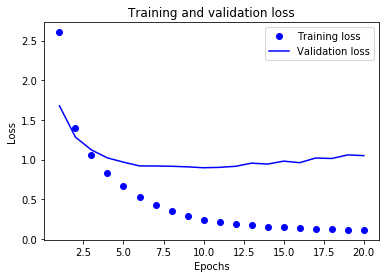

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

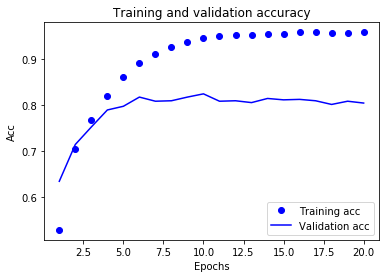

In [33]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [34]:
## train for 8 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 101us/step - loss: 2.5384 - acc: 0.5215 - val_loss: 1.6817 - val_acc: 0.6510
Epoch 2/8
7982/7982 [==============================] - 1s 93us/step - loss: 1.3781 - acc: 0.7106 - val_loss: 1.2797 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 88us/step - loss: 1.0179 - acc: 0.7783 - val_loss: 1.1324 - val_acc: 0.7510
Epoch 4/8
7982/7982 [==============================] - 1s 85us/step - loss: 0.8002 - acc: 0.8247 - val_loss: 1.0524 - val_acc: 0.7580
Epoch 5/8
7982/7982 [==============================] - 1s 86us/step - loss: 0.6410 - acc: 0.8629 - val_loss: 0.9791 - val_acc: 0.7950
Epoch 6/8
7982/7982 [==============================] - 1s 84us/step - loss: 0.5124 - acc: 0.8925 - val_loss: 0.9098 - val_acc: 0.8130
Epoch 7/8
7982/7982 [==============================] - 1s 82us/step - loss: 0.4125 - acc: 0.9138 - val_loss: 0.8913 - val_acc: 0.8220
Epoch 8/8
224

In [35]:
results

[0.98310030324057818, 0.78406055209260905]

In [37]:
model.metrics_names

['loss', 'acc']

In [38]:
predictions = model.predict(x_test)

In [39]:
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

0.99999994

In [41]:
np.argmax(predictions[0])

3